<a href="https://colab.research.google.com/github/pank8/python/blob/master/MovieLens_100K_Dataset_(pd%26np).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

# Загрузить данные в pandas

In [0]:
data = pd.read_csv( "u.data", delimiter = "\t", header = None)
data.columns = ["userid", "movieid", "rating", "timestamp"]

In [9]:
data.head()

,userid,movieid,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [0]:
genre = pd.read_csv("u.genre", delimiter = "|", header = None)
genre.columns = ["genre", "genreid"]

In [11]:
genre.head()

,genre,genreid
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4


In [0]:
info = pd.read_csv('u.info', delimiter = " ", header = None)
info.columns = ["count", "name"]

In [13]:
info.head()

,count,name
0,943,users
1,1682,items
2,100000,ratings


In [0]:
occupation  = pd.read_csv('u.occupation', delimiter = "\t", header = None)
occupation.columns = ["occupation"]

In [15]:
occupation.head()

,occupation
0,administrator
1,artist
2,doctor
3,educator
4,engineer


In [0]:
occupation['occupationid'] = occupation.index

In [17]:
occupation.head()

,occupation,occupationid
0,administrator,0
1,artist,1
2,doctor,2
3,educator,3
4,engineer,4


In [0]:
item  = pd.read_csv('u.item',sep='|', encoding='latin-1', header = None)
item.columns = ["movieid", "Title", "release", "video release date ", "URL","unknown", "Action", "Adventure", "Animation", "Children's","Comedy", "Crime", "Documentary", "Drama", "Fantasy","Film-Noir", "Horror", "Musical", "Mystery", "Romance","Sci-Fi", "Thriller", "War", "Western"]

In [19]:
item.head(5)

,movieid,Title,release,video release date,URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [0]:
  user  = pd.read_csv('u.user', delimiter = '|', header = None)
  user.columns = ["userid", "age", "gender", "occupation", "zip code"]

In [21]:
user.head(5)

,userid,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [0]:
user = user.merge(occupation, on=["occupation"], how='inner')

In [23]:
user.head(5)

,userid,age,gender,occupation,zip code,occupationid
0,1,24,M,technician,85711,19
1,4,24,M,technician,43537,19
2,44,26,M,technician,46260,19
3,77,30,M,technician,29379,19
4,143,42,M,technician,08832,19


# Посчитайте среднюю оценку, которую поставил каждый пользователь

In [24]:
ratings_avg = data.pivot_table(index=['userid'], values = 'rating', aggfunc='mean')
ratings_avg.head()

,rating
userid,
1,3.610294
2,3.709677
3,2.796296
4,4.333333
5,2.874286


# Отсортируйте фильмы по количеству оценок

In [0]:
data_joined = data.merge(item, on=["movieid"], how='inner')

In [26]:
data_joined.head()

,userid,movieid,rating,timestamp,Title,release,video release date,URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,226,242,5,883888671,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,154,242,3,879138235,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,306,242,5,876503793,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:

sorted_df = data_joined.groupby('Title').agg(['count'])['rating'].sort_values(['count'],ascending=False)

In [28]:
sorted_df.head()

,count
Title,
Star Wars (1977),583
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485


# Средствами pandasa соедините данные по оценкам с данными по пользователям (u.user)

In [0]:
data_joined = data_joined.merge(user, on=["userid"], how='inner')

In [30]:
data_joined.head()

,userid,movieid,rating,timestamp,Title,release,video release date,URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip code,occupationid
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,49,M,writer,55105,20
1,196,257,2,881251577,Men in Black (1997),04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,49,M,writer,55105,20
2,196,111,4,881251793,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Truth%20About...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,49,M,writer,55105,20
3,196,25,4,881251955,"Birdcage, The (1996)",08-Mar-1996,NaN,"http://us.imdb.com/M/title-exact?Birdcage,%20T...",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,49,M,writer,55105,20
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Adventures%20...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,49,M,writer,55105,20


# Построить модель, которая предсказывает оценку для фильма и пользователя (воспользоваться RandomForestRegressor, тк мы решаем задачу регрессии)

In [0]:
newdf  = data_joined.drop(data_joined.columns[[3, 4,5,6,7,29,30]], axis=1)

In [32]:
newdf.head()

,userid,movieid,rating,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupationid
0,196,242,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,49,M,20
1,196,257,2,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,49,M,20
2,196,111,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,49,M,20
3,196,25,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,49,M,20
4,196,382,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,49,M,20


In [0]:
newdf.gender.replace(['M', 'F'], [1, 0], inplace=True)

In [34]:
newdf.head()

,userid,movieid,rating,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupationid
0,196,242,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,49,1,20
1,196,257,2,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,49,1,20
2,196,111,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,49,1,20
3,196,25,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,49,1,20
4,196,382,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,49,1,20


In [35]:
print('The shape of our features is:', newdf.shape)

The shape of our features is: (100000, 25)


In [36]:
newdf.describe()

,userid,movieid,rating,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupationid
count,100000.00000,100000.000000,100000.000000,100000.0000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860,0.0001,0.255890,0.137530,0.036050,0.071820,0.298320,0.080550,0.007580,0.398950,0.013520,0.017330,0.053170,0.049540,0.052450,0.194610,0.12730,0.21872,0.093980,0.018540,32.969850,0.742600,11.076340
std,266.61442,330.798356,1.125674,0.0100,0.436362,0.344408,0.186416,0.258191,0.457523,0.272144,0.086733,0.489685,0.115487,0.130498,0.224373,0.216994,0.222934,0.395902,0.33331,0.41338,0.291802,0.134894,11.562623,0.437204,6.622849
min,1.00000,1.000000,1.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,7.000000,0.000000,0.000000
25%,254.00000,175.000000,3.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,24.000000,0.000000,4.000000
50%,447.00000,322.000000,4.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,30.000000,1.000000,13.000000
75%,682.00000,631.000000,4.000000,0.0000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,40.000000,1.000000,18.000000
max,943.00000,1682.000000,5.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,73.000000,1.000000,20.000000


In [0]:
# Labels are the values we want to predict
labels = np.array(newdf['rating'])

In [0]:
# Remove the labels from the features
# axis 1 refers to the columns
newdf= newdf.drop('rating', axis = 1)

In [0]:
# Saving feature names for later use
newdf_list = list(newdf.columns)

In [0]:
# Convert to numpy array
newdf = np.array(newdf)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [0]:
train_df, test_df, train_labels, test_labels = train_test_split(newdf, labels, test_size = 0.25, random_state = 10)

In [44]:
print('Training Features Shape:', train_df.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_df.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (75000, 24)
Training Labels Shape: (75000,)
Testing Features Shape: (25000, 24)
Testing Labels Shape: (25000,)


In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 10)

In [47]:
rf.fit(train_df, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=10, verbose=0,
                      warm_start=False)

In [0]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_df)

In [0]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)

In [51]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'points.')

Mean Absolute Error: 0.81 points.


In [0]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

In [53]:
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 67.79 %.


In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [61]:
meanSquaredError=mean_squared_error(test_labels,predictions)
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)

MSE: 1.0339809152800001
RMSE: 1.016848521304919


In [0]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [0]:
# Pull out one tree from the forest
tree = rf.estimators_[5]

In [0]:
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = newdf_list, rounded = True, precision = 1)

In [0]:
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

In [66]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_df, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
# Extract the small tree
tree_small = rf_small.estimators_[5]

In [0]:
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = newdf_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')

In [0]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

In [0]:
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(newdf_list, importances)]

In [0]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [72]:
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: userid               Importance: 0.28
Variable: movieid              Importance: 0.24
Variable: age                  Importance: 0.18
Variable: occupationid         Importance: 0.12
Variable: gender               Importance: 0.03
Variable: Comedy               Importance: 0.02
Variable: Romance              Importance: 0.02
Variable: Action               Importance: 0.01
Variable: Adventure            Importance: 0.01
Variable: Children's           Importance: 0.01
Variable: Crime                Importance: 0.01
Variable: Drama                Importance: 0.01
Variable: Film-Noir            Importance: 0.01
Variable: Horror               Importance: 0.01
Variable: Musical              Importance: 0.01
Variable: Mystery              Importance: 0.01
Variable: Sci-Fi               Importance: 0.01
Variable: Thriller             Importance: 0.01
Variable: War                  Importance: 0.01
Variable: unknown              Importance: 0.0
Variable: Animation            Importance

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [0]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=10)

In [0]:
# Extract the two most important features
important_indices = [newdf_list.index('userid'), newdf_list.index('movieid')]
train_important = train_df[:, important_indices]
test_important = test_df[:, important_indices]

In [75]:
# Train the random forest
rf_most_important.fit(train_important, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=10, verbose=0,
                      warm_start=False)

In [0]:
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)

In [77]:
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'points.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.89 points.
Accuracy: 65.19 %.


Text(0.5, 1.0, 'Variable Importances')

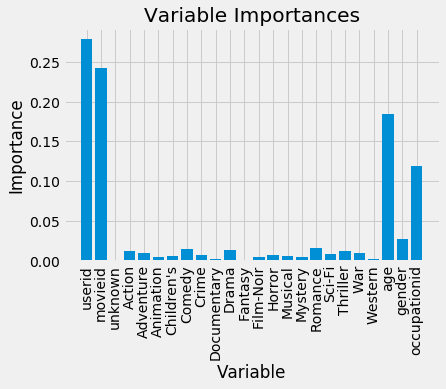

In [79]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, newdf_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')